**Tutorial Pekan keempat**

Membangun model **word2vec Skip-Gram** dengan library Gensim

- mengakses vektor/embedding kata

- mendapatkan nilai cosine similarity antar kata

- mendapatkan daftar kata dengan similarity tertinggi (N-top similarities)

- visualisasi word embedding


Sumber: https://radimrehurek.com/gensim/models/word2vec.html

Import library untuk menampilkan pesan log proses

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Import library gensim dan package yang dibutuhkan

Package datapath tidak digunakan di contoh ini. 

Jika akan menggunakan contoh data yang sudah ada di Gensim, gunakan package datapath.

Class MyCorpus bertujuan untuk memproses data teks yang akan digunakan sebagai sumber data latih membuat model word2vec.

In [ ]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus(object): 
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = 'drive/My Drive/test_code_2020/NLP/pekan_4/contoh_teks_w2v_gensim.txt' # sesuaikan dengan path masing-masing
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            # asumsi 1 dokumen adalah 1 kalimat, dituliskan per baris. Antar token dipisahkan dengan spasi
            yield utils.simple_preprocess(line)

Import package untuk membangun model

Panggil fungsi Word2Vec untuk membangun model word2vec, parameter berupa kalimat-kalimat korpus

Perhatikan bahwa setting yang digunakan adalah setting default, sepertiL min_count atau jumlah kemunculan kata = 5. Pada eksperimen yang berbeda, sesuaikan setting.

In [ ]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

2020-09-27 04:28:20,326 : INFO : collecting all words and their counts
2020-09-27 04:28:20,331 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-09-27 04:28:20,341 : INFO : collected 308 word types from a corpus of 780 raw words and 38 sentences
2020-09-27 04:28:20,343 : INFO : Loading a fresh vocabulary
2020-09-27 04:28:20,344 : INFO : effective_min_count=5 retains 36 unique words (11% of original 308, drops 272)
2020-09-27 04:28:20,346 : INFO : effective_min_count=5 leaves 374 word corpus (47% of original 780, drops 406)
2020-09-27 04:28:20,347 : INFO : deleting the raw counts dictionary of 308 items
2020-09-27 04:28:20,348 : INFO : sample=0.001 downsamples 36 most-common words
2020-09-27 04:28:20,349 : INFO : downsampling leaves estimated 80 word corpus (21.6% of prior 374)
2020-09-27 04:28:20,351 : INFO : estimated required memory for 36 words and 100 dimensions: 46800 bytes
2020-09-27 04:28:20,353 : INFO : resetting layer weights
2020-09-27 04:28:20,3

Tes mengakses sebuah vektor, dengan fungsi wv, parameter berupa kata.

Coba tes dengan kata-kata yang tidak pernah muncul di korpus, apa yang terjadi?

Kemudian berapa panjang embedding-nya? Setting panjang embedding yang digunakan di contoh ini juga setting default.

In [ ]:
vec_positif = model.wv['positif']
print(vec_positif)

[ 2.3354695e-03  1.3608172e-03  5.8681544e-05  2.4780957e-03
 -6.3750177e-04  3.1308690e-03 -1.4097812e-03 -3.2921878e-03
  3.1877973e-03 -2.8767542e-03  3.4035584e-03 -5.2954398e-05
 -1.7722627e-03 -3.8966315e-03 -3.4074686e-03  2.8408284e-03
  1.8054585e-03 -4.6579149e-03  1.6955443e-03 -4.4794739e-03
  7.8062748e-04  2.1379236e-03  3.2065152e-03 -2.4183807e-03
  1.9395093e-03 -1.2638654e-03  1.9510917e-03  9.6791994e-04
  2.5244344e-03  3.8392253e-03 -3.4207308e-03 -2.3225756e-04
 -4.4620177e-03 -3.9821053e-03 -3.6936360e-03 -4.2855884e-03
 -1.3508451e-03 -3.8560671e-03 -2.0345948e-03 -3.7092015e-03
 -1.3461281e-03  3.2020768e-03 -9.7519805e-04 -7.0562579e-05
 -2.8665459e-03 -3.0145778e-03  2.5707842e-03 -3.8165981e-03
  1.0902054e-03  3.4866061e-03 -3.1273800e-03 -4.6845032e-03
  4.6579032e-03 -4.9381615e-03 -1.4134815e-04  3.6056833e-03
  2.0326825e-03 -3.3193328e-03 -2.8639031e-03  3.2584749e-03
  1.5534188e-03 -2.9898514e-03  4.3592220e-03 -3.3923713e-04
  2.9847822e-03  3.31437

Periksa 5 kata yang similarity-nya paling tinggi dengan sebuah kata. 

Perhitungan similarity apa yang digunakan sebagai default di Gensim?

In [ ]:
print(model.wv.most_similar(positive=['positif'], topn=5))

2020-09-27 04:31:36,373 : INFO : precomputing L2-norms of word weight vectors


[('juga', 0.32700029015541077), ('ke', 0.25262394547462463), ('ini', 0.156389519572258), ('sebanyak', 0.12045949697494507), ('di', 0.10153909027576447)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [ ]:
print(model.wv.most_similar(positive=['covid'], topn=5))

[('kabupaten', 0.239918053150177), ('sabtu', 0.18481691181659698), ('kata', 0.15351608395576477), ('pada', 0.13608117401599884), ('ada', 0.10592517256736755)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



Tes nilai similarity antar 2 kata

In [ ]:
print(model.wv.similarity('covid', 'sembuh'))

-0.1088202


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



Persiapan visualisasi embeddings, import library yang diperlukan

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

Fungsi untuk reduksi dimensi, supaya lebih mudah dimengerti.

Pada contoh, dimensi vektor direduksi menjadi 2.

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


Lakukan proses reduksi dimensi

In [ ]:
x_vals, y_vals, labels = reduce_dimensions(model)

Coba tampilkan dengan plotly. Image akan disimpan sebagai file .html.

Perhatikan path penyimpanan file, sesuaikan dengan komputer/drive masing-masing.

In [ ]:
def plot_with_plotly(x_vals, y_vals, labels):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]
    
    plot(data, filename='drive/My Drive/test_code_2020/NLP/pekan_4/word-embedding-plot.html')


In [ ]:
plot_with_plotly(x_vals,y_vals,labels)

Fungsi untuk visualisasi dengan matplotlib

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


Tes plot dengan matplotlib

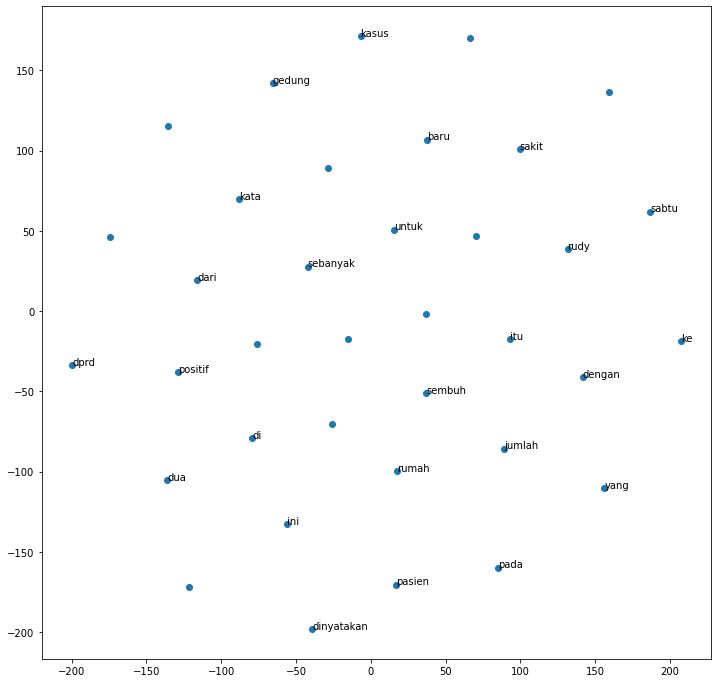

In [ ]:
plot_with_matplotlib(x_vals, y_vals, labels)


